<a href="https://colab.research.google.com/github/Rakibul-Hassan32/Natural-Language-Processing/blob/main/NLP_RNN_and_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing with RNNs - Toxic Comment Classification

Outline:

1. Download and explore the data
2. Prepare the data for training
3. Build a recurrent neural network
4. Train & evaluate the model
5. Make predictions & submit to Kaggle

## Download & Explore Data

Outline:
1. Download the data from Kaggle
2. Load data into Pandas dataframes
3. Explore the dataset

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [ ]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 36% 19.0M/52.6M [00:00<00:00, 197MB/s]
100% 52.6M/52.6M [00:00<00:00, 281MB/s]


In [ ]:
!unzip jigsaw-toxic-comment-classification-challenge.zip -d data

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: data/sample_submission.csv.zip  
  inflating: data/test.csv.zip       
  inflating: data/test_labels.csv.zip  
  inflating: data/train.csv.zip      


In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv('data/train.csv.zip')
test_df = pd.read_csv('data/test.csv.zip')
sub_df = pd.read_csv('data/sample_submission.csv.zip')

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
raw_df.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
46138,7b412408d67a534e,Perhaps because you haven't added it yet ;-)? ...,0,0,0,0,0,0
118860,7b4a5fe756b667ff,Thanks for that - have now sorted out the Yate...,0,0,0,0,0,0
157570,e04ba7441f35c335,"""==Rsazevedo you lied to me==\n\nRsazevedo, yo...",0,0,0,0,0,0
8467,1680882cb72dd775,People should be able to contribute to their o...,0,0,0,0,0,0
131389,bee969b9cc875d55,""", 12 November 2013 (UTC)\n I have to agree. ...",0,0,0,0,0,0
27299,48393c9029264a24,WP:VAMOS\nMost images used in visual arts arti...,0,0,0,0,0,0
136633,dae9aeee7216c94c,I dare you to delete this for the eighth time....,0,0,0,0,0,0
119756,8059d36c86b18c68,Yes \nAny third party would be able to tell yo...,1,0,0,0,0,0
14388,2601d261f665e57c,Vandalism by Nimbusania \n\nWhy did you vandal...,0,0,0,0,0,0
124201,9866d68829ba2335,"""\n \n''Grumpyness, and an inability to see ac...",0,0,0,0,0,0


In [ ]:
raw_df.comment_text.values[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
target_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
for col in target_cols:
    print(raw_df[col].value_counts(normalize=True))

0    0.904156
1    0.095844
Name: toxic, dtype: float64
0    0.990004
1    0.009996
Name: severe_toxic, dtype: float64
0    0.947052
1    0.052948
Name: obscene, dtype: float64
0    0.997004
1    0.002996
Name: threat, dtype: float64
0    0.950636
1    0.049364
Name: insult, dtype: float64
0    0.991195
1    0.008805
Name: identity_hate, dtype: float64


In [ ]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [ ]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


## Prepare the Dataset for Training

Outline:
- Create a vocabulary using TorchText
- Create training & validation sets
- Create PyTorch dataloaders

### Create a Vocabulary

In [ ]:
from torchtext.data.utils import get_tokenizer

In [ ]:
tokenizer = get_tokenizer('basic_english')

In [ ]:
sample_comment = raw_df.comment_text.values[0]

In [ ]:
sample_comment

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
sample_comment_tokens = tokenizer(sample_comment)
sample_comment_tokens[:10]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'hardcore',
 'metallica']

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
comment_tokens = raw_df.comment_text.map(tokenizer)

In [ ]:
VOCAB_SIZE = 1500

In [ ]:
unk_token = '<unk>'
pad_token = '<pad>'

In [ ]:
vocab = build_vocab_from_iterator(comment_tokens,
                                  specials=[unk_token, pad_token],
                                  max_tokens=VOCAB_SIZE)

In [ ]:
vocab[unk_token]

0

In [ ]:
vocab.set_default_index(vocab[unk_token])

In [ ]:
vocab['this']

18

In [ ]:
vocab['harcore']

0

In [ ]:
sample_indices = vocab.lookup_indices(sample_comment_tokens)
sample_indices[:10]

[667, 85, 3, 140, 142, 185, 39, 663, 0, 0]

In [ ]:
sample_comment_recovered = vocab.lookup_tokens(sample_indices)
sample_comment_recovered[:10]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 '<unk>',
 '<unk>']

### Create Training & Validation Sets

- Define a custom Pytorch Dataset
- Pass raw data into the dataset
- Split the PyTorch Dataset

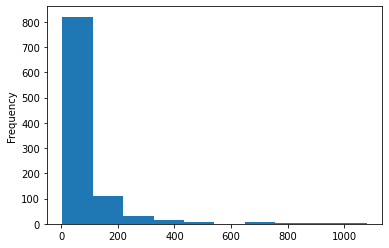

In [ ]:
raw_df.comment_text.sample(1000).map(tokenizer).map(len).plot(kind='hist')

In [ ]:
MAX_LENGTH = 150

In [ ]:
def pad_tokens(tokens):
    if (len(tokens) >= MAX_LENGTH):
        return tokens[:MAX_LENGTH]
    else:
        return tokens + [pad_token] * (MAX_LENGTH - len(tokens))

In [ ]:
import torch

In [ ]:
from torch.utils.data import Dataset

In [ ]:
class JigsawDataset(Dataset):
    def __init__(self, df, is_test=False):
        self.df = df
        self.is_test = is_test

    def __getitem__(self, index):
        comment_text = self.df.comment_text.values[index]
        comment_tokens = pad_tokens(tokenizer(comment_text))
        input = torch.tensor(vocab.lookup_indices(comment_tokens))
        if self.is_test:
            target = torch.tensor([0,0,0,0,0,0]).float()
        else:
            target = torch.tensor(self.df[target_cols].values[index]).float()
        return input, target

    def __len__(self):
        return len(self.df)

In [ ]:
raw_ds = JigsawDataset(raw_df)

In [ ]:
raw_df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
raw_ds[0]

(tensor([ 667,   85,    3,  140,  142,  185,   39,  663,    0,    0, 1287,   96,
          329,   27,   57,    0,    9,   31,    0,    4,   61,    0,   21,   71,
            0,  158,    6,    0,   45,  130, 1167,    0,    0,    2,    8,   55,
           70,    9,   31,  253,    3,  369,   41,    3,   50,   38,  155,    6,
            9,   81,    0,   99,    2,    0,    2,    0,    2,    0,    2, 1122,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

In [ ]:
from torch.utils.data import random_split

In [ ]:
VAL_FRAC = 0.25

In [ ]:
train_ds, val_ds = random_split(raw_ds, [1-VAL_FRAC, VAL_FRAC])

In [ ]:
len(raw_ds), len(train_ds), len(val_ds)

(159571, 119679, 39892)

In [ ]:
test_ds = JigsawDataset(test_df, is_test=True)

In [ ]:
test_df.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
test_ds[0]

(tensor([   0,  636,    0,  649,   12,   69,    0,   93,   10,    9,  169,  359,
           23,    0,   89,   30,   10,    8,    0,   10, 1488,    0,    2,    2,
            2,    6,   68,  636,    0,    0,    0,  690,    0,    8,  105,   10,
            5,    0,   39,  419,   10,  699,    0,   46,    2,    0,  649,   12,
           47,    0,   15,    0,  668,  439,    2,  443,    0,   13,  332,   21,
          167,    2,    8,    0,   12,  251,    0,   62,    0,   59,   34,   11,
            0,  171,    2,    2,    2,    0,  690,    0,  105,  226,  160,  490,
           95,    2,    4,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

### Create PyTorch Dataloaders

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
BATCH_SIZE = 256

In [ ]:
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE*2, num_workers=8, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE*2, num_workers=8, pin_memory=True)

In [ ]:
for batch in train_dl:
    b_inputs, b_targets = batch
    print('b_input.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)

    break

b_input.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])


## Build a Recurrent Neural Network

Outline:
1. Understand how recurrent neural networks work
2. Create a recurrent neural network
3. Pass some through the network

In [ ]:
import torch.nn as nn
import torch.functional as F

In [ ]:
vocab[pad_token]

1

In [ ]:
emb_layer = nn.Embedding(VOCAB_SIZE, 256, 1)

In [ ]:
rnn_layer = nn.RNN(256, 128, 1, batch_first=True)

In [ ]:
for batch in train_dl:
    b_inputs, b_targets = batch
    print('b_input.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)

    emb_out = emb_layer(b_inputs)
    print('emb_out.shape', emb_out.shape)

    rnn_out, hn = rnn_layer(emb_out)
    print('rnn_out.shape', rnn_out.shape)
    print('hn.shape', hn.shape)

    break

b_input.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])
emb_out.shape torch.Size([256, 150, 256])
rnn_out.shape torch.Size([256, 150, 128])
hn.shape torch.Size([1, 256, 128])


In [ ]:
!pip install pytorch_lightning --quiet

     |████████████████████████████████| 800 kB 4.6 MB/s 
     |████████████████████████████████| 125 kB 83.0 MB/s 
     |████████████████████████████████| 512 kB 79.4 MB/s 


In [ ]:
import pytorch_lightning as pl

In [ ]:
import torch.nn.functional as F

In [ ]:
import numpy as np

In [ ]:
class JigsawModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.emb = nn.Embedding(VOCAB_SIZE, 256, 1)
        self.lstm = nn.LSTM(256, 128, 1, batch_first=True)
        self.linear = nn.Linear(128, 6)
        self.learning_rate = 0.001

    def forward(self, x):
        out = self.emb(x)
        out, hn = self.lstm(out)
        out = F.relu(out[:,-1,:])
        out = self.linear(out)
        return out

    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.sigmoid(outputs)
        loss = F.binary_cross_entropy(probs, targets)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.sigmoid(outputs)
        loss = F.binary_cross_entropy(probs, targets)
        return loss.item()

    def validation_epoch_end(self, validation_step_outputs):
        loss = np.mean(validation_step_outputs)
        print("Epoch #{}; Loss: {:4f} ".format(self.current_epoch, loss))

    def predict_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.sigmoid(outputs)
        return probs

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

In [ ]:
model = JigsawModel()

In [ ]:
for batch in train_dl:
    b_inputs, b_targets = batch
    print('b_input.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)

    outputs = model(b_inputs)
    print('outputs.shape', outputs.shape)

    probs = torch.sigmoid(outputs)
    loss = F.binary_cross_entropy(probs, b_targets)
    print('Loss', loss)
    break

b_input.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])
outputs.shape torch.Size([256, 6])
Loss tensor(0.6917, grad_fn=<BinaryCrossEntropyBackward0>)


## Train and Evaluate the Model

In [ ]:
trainer = pl.Trainer(max_epochs=3, accelerator='gpu', auto_lr_find=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.tune(model, train_dl)

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.00478630092322638
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_50b3f325-e61c-4318-8d53-dfd48c1ccde0.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint file at /content/.lr_find_50b3f325-e61c-4318-8d53-dfd48c1ccde0.ckpt


{'lr_find': <pytorch_lightning.tuner.lr_finder._LRFinder at 0x7f9249b40550>}

In [ ]:
model.learning_rate

0.00478630092322638

In [ ]:
trainer.fit(model, train_dl, val_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type      | Params
-------------------------------------
0 | emb    | Embedding | 384 K 
1 | lstm   | LSTM      | 197 K 
2 | linear | Linear    | 774   
-------------------------------------
582 K     Trainable params
0         Non-trainable params
582 K     Total params
2.330     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.691875 


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.073076 


Validation: 0it [00:00, ?it/s]

Epoch #1; Loss: 0.065023 


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch #2; Loss: 0.064172 


## Make Predictions & Submit

In [ ]:
test_df.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
for batch in test_dl:
    b_inputs, b_targets = batch
    print('b_inputs.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)
    break

b_inputs.shape torch.Size([512, 150])
b_targets.shape torch.Size([512, 6])


In [ ]:
test_preds = trainer.predict(model, test_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 468it [00:00, ?it/s]

In [ ]:
test_preds = torch.cat(test_preds)

In [ ]:
test_preds.shape

torch.Size([153164, 6])

In [ ]:
test_preds

tensor([[9.8514e-01, 3.6960e-01, 9.3268e-01, 4.5492e-02, 8.6001e-01, 2.4571e-01],
        [6.6544e-03, 9.5455e-05, 1.4566e-03, 2.8526e-04, 2.3743e-03, 8.5336e-04],
        [9.5926e-03, 1.2386e-04, 2.3447e-03, 3.2115e-04, 2.8670e-03, 9.5028e-04],
        ...,
        [6.3757e-03, 1.0199e-04, 1.4886e-03, 3.1001e-04, 2.3857e-03, 8.5090e-04],
        [3.4499e-03, 5.9353e-05, 9.4897e-04, 1.3394e-04, 1.1450e-03, 4.0778e-04],
        [6.7744e-01, 2.3407e-02, 2.9260e-01, 1.6682e-02, 3.3222e-01, 6.3561e-02]])

In [ ]:
test_probs = torch.sigmoid(test_preds)

In [ ]:
sub_df[target_cols] = test_probs.detach().cpu().numpy()

In [ ]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.728126,0.591361,0.717618,0.511371,0.702663,0.561119
1,0000247867823ef7,0.501664,0.500024,0.500364,0.500071,0.500594,0.500213
2,00013b17ad220c46,0.502398,0.500031,0.500586,0.500080,0.500717,0.500238
3,00017563c3f7919a,0.501505,0.500023,0.500328,0.500065,0.500544,0.500191
4,00017695ad8997eb,0.502008,0.500027,0.500477,0.500076,0.500646,0.500204
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.504916,0.500092,0.501056,0.500184,0.501764,0.500586
153160,fffd7a9a6eb32c16,0.502598,0.500037,0.500583,0.500120,0.500869,0.500291
153161,fffda9e8d6fafa9e,0.501594,0.500026,0.500372,0.500077,0.500596,0.500213
153162,fffe8f1340a79fc2,0.500862,0.500015,0.500237,0.500033,0.500286,0.500102


In [ ]:
sub_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv

id,toxic,severe_toxic,obscene,threat,insult,identity_hate
00001cee341fdb12,0.72812605,0.5913613,0.7176182,0.51137114,0.70266306,0.56111944
0000247867823ef7,0.5016636,0.50002384,0.5003641,0.5000713,0.5005936,0.5002134
00013b17ad220c46,0.50239813,0.500031,0.5005862,0.5000803,0.50071675,0.5002376
00017563c3f7919a,0.501505,0.50002253,0.5003276,0.50006527,0.5005442,0.500191
00017695ad8997eb,0.50200754,0.5000269,0.50047714,0.50007606,0.50064564,0.5002039
0001ea8717f6de06,0.50149107,0.50002205,0.50032103,0.50006306,0.5005344,0.50018644
00024115d4cbde0f,0.5014186,0.5000208,0.50028896,0.5000587,0.500487,0.5001697
000247e83dcc1211,0.5343304,0.50087047,0.5057776,0.50117475,0.5125339,0.503937
00025358d4737918,0.50083727,0.5000131,0.50024486,0.5000303,0.50024164,0.5000872


In [ ]:
sample_df = raw_df.sample(10)

In [ ]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
90860,f31456cb0794aa16,"""\n\n New station names - """"Shanghai East"""", ""...",0,0,0,0,0,0
152444,8d730b459bfe009b,Wikipedia:WikiProject Irish Football\nTime to ...,0,0,0,0,0,0
32021,55187866721a5da6,Eatsushi is not a pornographic site is is an e...,0,0,0,0,0,0
79605,d4f70d5da66e55eb,AZ had a fusion with another club from Alkmaar...,0,0,0,0,0,0
22370,3b07dca044d120cd,Your edit to Rapture \nThank you for experimen...,0,0,0,0,0,0
95915,0108c64b92e8d18a,""" Don't get me wrong, youre allowed to disagre...",0,0,0,0,0,0
108258,42b13c37f575362e,"""\nLinux vs GNU/Linux\n\n2004-05-31 23:45, Hi ...",0,0,0,0,0,0
100640,1aa8882346cf782c,"""FALSE. Whoever wrote them is making up quotes...",0,0,0,0,0,0
3133,087337fa7a4131d5,and i have a small penis lalalalalalalalala,1,0,0,0,0,0
86359,e6f68fd10b64a5f9,Die\nI just wanted to tell you that i hate you...,1,1,1,0,1,1


In [ ]:
sample_ds = JigsawDataset(sample_df)

In [ ]:
sample_dl = DataLoader(sample_ds, batch_size=10)

In [ ]:
sample_preds = trainer.predict(model, sample_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 468it [00:00, ?it/s]

In [ ]:
sample_probs = torch.sigmoid(sample_preds[0])

In [ ]:
(sample_probs > 0.6).int()

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1, 0]], dtype=torch.int32)

In [ ]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
90860,f31456cb0794aa16,"""\n\n New station names - """"Shanghai East"""", ""...",0,0,0,0,0,0
152444,8d730b459bfe009b,Wikipedia:WikiProject Irish Football\nTime to ...,0,0,0,0,0,0
32021,55187866721a5da6,Eatsushi is not a pornographic site is is an e...,0,0,0,0,0,0
79605,d4f70d5da66e55eb,AZ had a fusion with another club from Alkmaar...,0,0,0,0,0,0
22370,3b07dca044d120cd,Your edit to Rapture \nThank you for experimen...,0,0,0,0,0,0
95915,0108c64b92e8d18a,""" Don't get me wrong, youre allowed to disagre...",0,0,0,0,0,0
108258,42b13c37f575362e,"""\nLinux vs GNU/Linux\n\n2004-05-31 23:45, Hi ...",0,0,0,0,0,0
100640,1aa8882346cf782c,"""FALSE. Whoever wrote them is making up quotes...",0,0,0,0,0,0
3133,087337fa7a4131d5,and i have a small penis lalalalalalalalala,1,0,0,0,0,0
86359,e6f68fd10b64a5f9,Die\nI just wanted to tell you that i hate you...,1,1,1,0,1,1
